# CAC ASSIGNMENT
# TANISHA AGARWAL
# 23122041
# 3MSc DS(A)

-----------------------------------------------------------------------------------------------------------------------------

## PROBLEM STATEMENT

Here my aim is to explore the effectiveness of Principal Component Analysis (PCA) as a preprocessing technique in combination with Linear Regression for predictive modeling tasks. The dataset under consideration contains a multitude of features, and our goal is to investigate whether dimensionality reduction through PCA enhances the performance of linear regression models while maintaining or even improving interpretability.We have also tried SVR(Support Vector Regrrssion) to see if the accuracy is increased.

Furthermore, we have also divided the prices of diamond into bins and tried SVM(Support Vector Machine) and checked the accuracy then.

## DATASET DESCRIPTION

The dataset comprises- 
- price [price in US dollars (\$326--\$18,823)] -  TO BE PREDICTED BY OUR MODEL
- carat [weight of the diamond (0.2--5.01)] - NUMERICAL DATA
- cut [quality of the cut (Fair, Good, Very Good, Premium, Ideal)] - CATEGORICAL DATA
- color [diamond colour, from J (worst) to D (best)] - CATEGORICAL DATA
- clarity [a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))] - CATEGORICAL  DATA
- x [length in mm (0--10.74)] -  NUMERICAL DATA
- y [width in mm (0--58.9)] -  NUMERICAL DATA
- z [depth in mm (0--31.8)] -  NUMERICAL DATA
- depth [total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)] -  NUMERICAL DATA
- table [width of top of diamond relative to widest point (43--95)] -  NUMERICAL DATA

### DATA EXPLORATION AND PRE-PROCESSING

In [1]:
# imporitng required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#importing the data-set
df = pd.read_csv("D:/MACHINE LEARNING/CAC assignment/diamonds.csv")
df.head()

,number,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape  #the dimensions of the data

(53940, 11)

In [4]:
df.describe()  # statistical analysis of data

,number,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.info() #basic information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   number   53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
# dropping the extra index column- which is un-necessary from the trainer's pov
df.drop(columns=['number'], inplace= True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
# renaming columns for better clarity
df.rename(columns = {'x':'length'}, inplace = True)
df.rename(columns = {'y':'width'}, inplace = True)
df.rename(columns = {'z':'depth(mm)'}, inplace = True)
df.rename(columns = {'depth':'depth_percentage'}, inplace = True)
df.head()

,carat,cut,color,clarity,depth_percentage,table,price,length,width,depth(mm)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
#finding numeric columns 
numeric=df.select_dtypes(include=[np.number])
numeric_cols=numeric.columns.values
print(numeric_cols)

['carat' 'depth_percentage' 'table' 'price' 'length' 'width' 'depth(mm)']


In [9]:
#finding non numeric columns 
non_numeric=df.select_dtypes(exclude=[np.number])
non_numeric_cols=non_numeric.columns.values
print(non_numeric_cols)

['cut' 'color' 'clarity']


#### DATA CLEANING

We will now find unique values and see if there is any duplicate data present in the dataset .
If we find any duplicate data or row we will simply either replace numeric value with median or we will just drop that particular column

In [10]:
# to check whether there is a null value in the data set or not
df.isnull().sum()

carat               0
cut                 0
color               0
clarity             0
depth_percentage    0
table               0
price               0
length              0
width               0
depth(mm)           0
dtype: int64

In [11]:
df.count()  #count of unique columns

carat               53940
cut                 53940
color               53940
clarity             53940
depth_percentage    53940
table               53940
price               53940
length              53940
width               53940
depth(mm)           53940
dtype: int64

In [12]:
df.nunique()

carat                 273
cut                     5
color                   7
clarity                 8
depth_percentage      184
table                 127
price               11602
length                554
width                 552
depth(mm)             375
dtype: int64

The rows in the dataset neither contains any duplicate rows nor any missing values

### EXPLORATORY DATA ANALYSIS

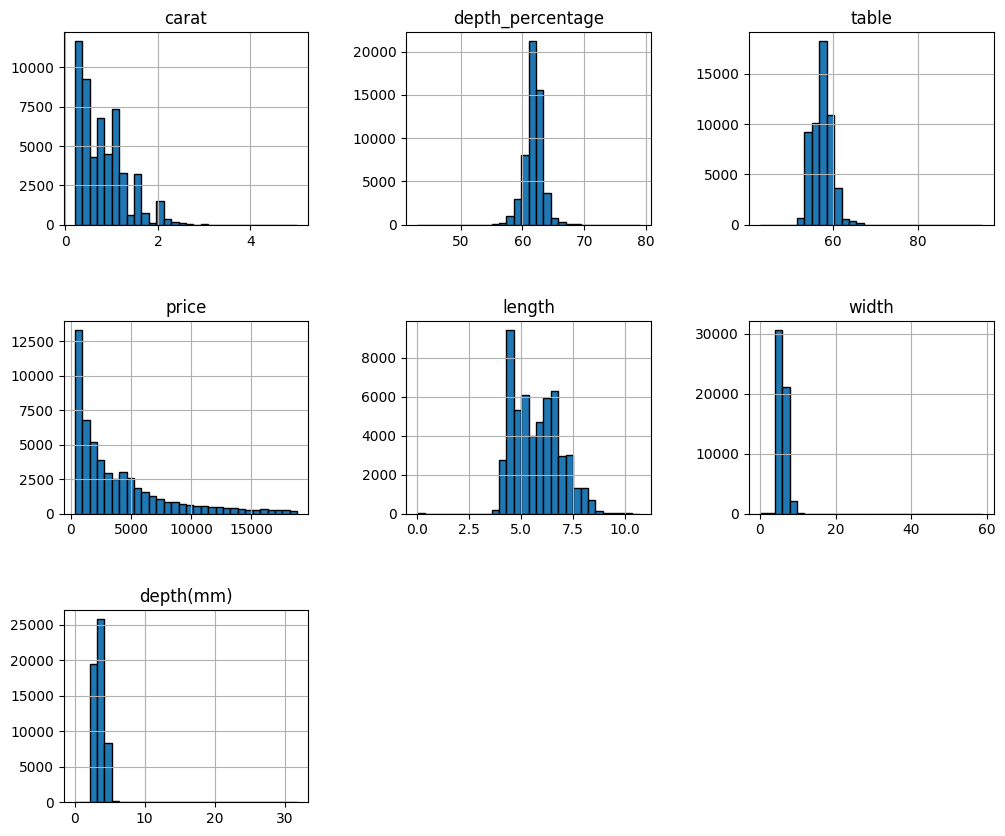

In [13]:
#histograms for each numerical feature to understand the distribution.
numeric.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.4)

<Axes: >

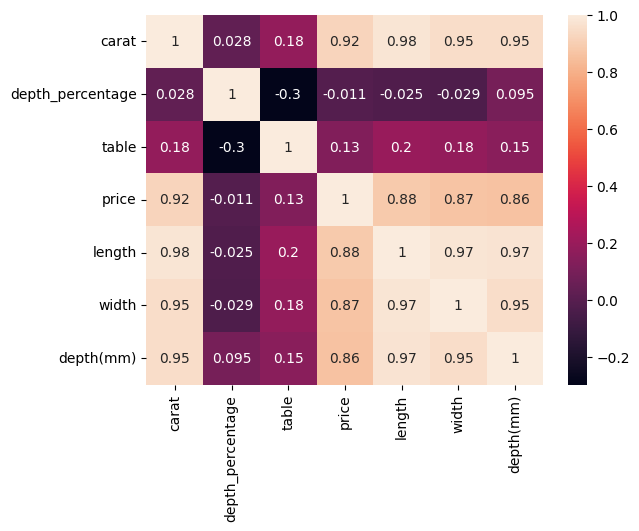

In [14]:
# we find the correlation between our dataset
# it only works on numeric data

import seaborn as sns
correlation = numeric.corr()
sns.heatmap(correlation,annot=True)

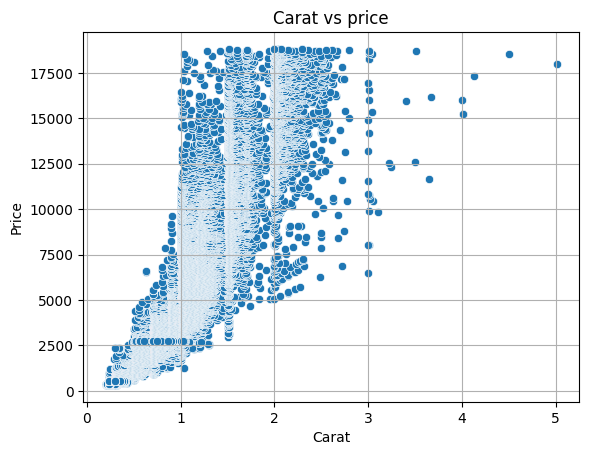

In [15]:
# relationship between carat and price

sns.scatterplot(x="carat", y="price",data=numeric)

# Add labels and title
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Carat vs price')
plt.grid(True)

# Show plot
plt.show()

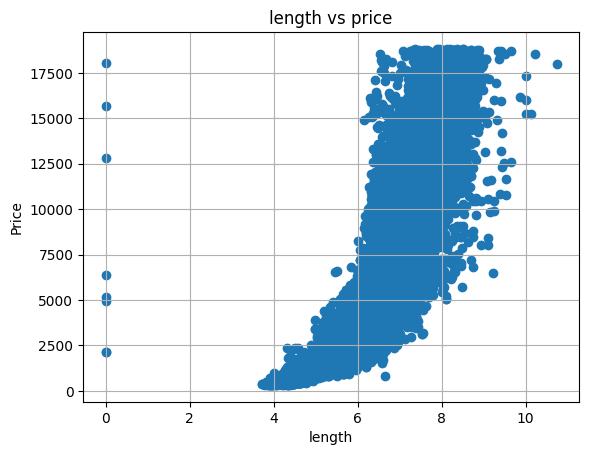

In [16]:
# relationship between length and price

plt.scatter(x="length", y="price",data=numeric)

# Add labels and title
plt.xlabel('length')
plt.ylabel('Price')
plt.title('length vs price')
plt.grid(True)

# Show plot
plt.show()

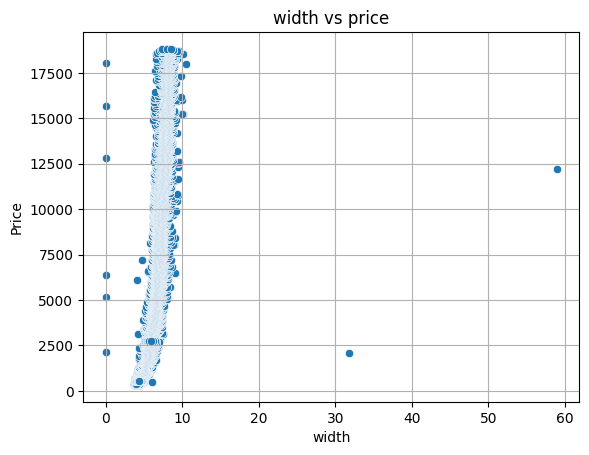

In [17]:
# relationship between width and price

sns.scatterplot(x="width", y="price",data=numeric)

# Add labels and title
plt.xlabel('width')
plt.ylabel('Price')
plt.title('width vs price')
plt.grid(True)

# Show plot
plt.show()

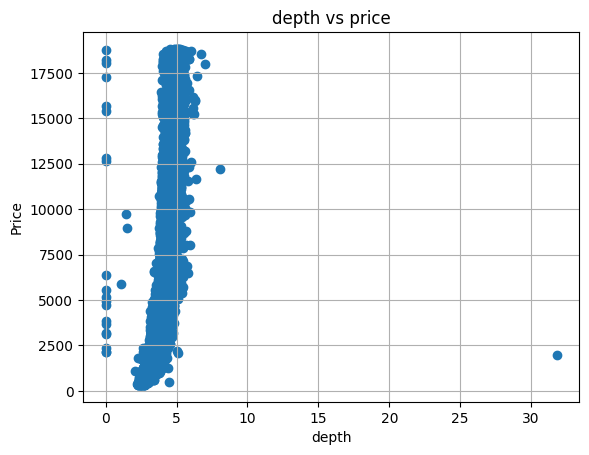

In [18]:
# relationship between depth and price

plt.scatter(x="depth(mm)", y="price",data=numeric)

# Add labels and title
plt.xlabel('depth')
plt.ylabel('Price')
plt.title('depth vs price')
plt.grid(True)

# Show plot
plt.show()

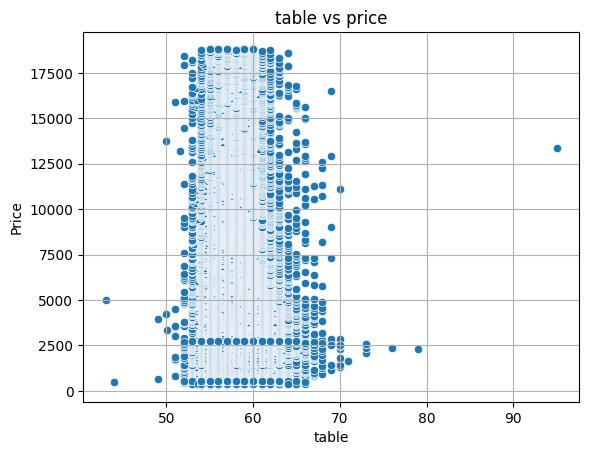

In [19]:
# relationship between table(width of top of diamond relative to widest point ) and price

sns.scatterplot(x="table", y="price",data=numeric)

# Add labels and title
plt.xlabel('table')
plt.ylabel('Price')
plt.title('table vs price')
plt.grid(True)

# Show plot
plt.show()

### PRINCIPAL COMPONENT ANALYSIS (PCA): 

Applying PCA to reduce the dimensionality of our dataset. This will help in reducing noise and computational complexity while retaining most of the relevant information.

In [20]:
# selecting relevant features in our data set
features = ['carat', 'depth_percentage', 'table', 'length', 'width', 'depth(mm)']
X = df[features]
X.head()

,carat,depth_percentage,table,length,width,depth(mm)
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


<Axes: >

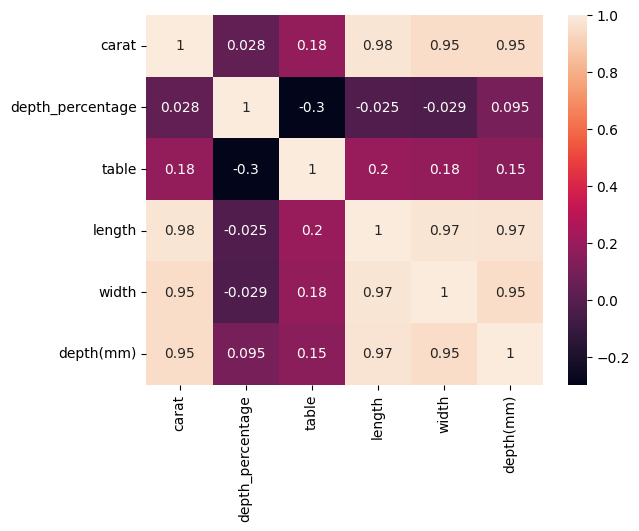

In [21]:
#plotting the correlation between variables
import seaborn as sns
correlation = X.corr()
sns.heatmap(correlation,annot=True)

In [22]:
# Mean of the data
X_mean = X.mean()
print(X_mean)

carat                0.797940
depth_percentage    61.749405
table               57.457184
length               5.731157
width                5.734526
depth(mm)            3.538734
dtype: float64


In [23]:
# Standard deviation of the data
X_std = X.std()
print(X_std)

carat               0.474011
depth_percentage    1.432621
table               2.234491
length              1.121761
width               1.142135
depth(mm)           0.705699
dtype: float64


In [24]:
# Standardization of the data
Z = (X - X_mean) / X_std
print(Z)

          carat  depth_percentage     table    length     width  depth(mm)
0     -1.198157         -0.174090 -1.099662 -1.587823 -1.536181  -1.571115
1     -1.240350         -1.360726  1.585514 -1.641310 -1.658759  -1.741159
2     -1.198157         -3.384987  3.375631 -1.498677 -1.457382  -1.741159
3     -1.071577          0.454129  0.242926 -1.364959 -1.317293  -1.287708
4     -1.029384          1.082348  0.242926 -1.240155 -1.212227  -1.117663
...         ...               ...       ...       ...       ...        ...
53935 -0.164426         -0.662705 -0.204603  0.016798  0.022304  -0.054887
53936 -0.164426          0.942744 -1.099662 -0.036690  0.013548   0.100987
53937 -0.206619          0.733338  1.137985 -0.063434 -0.047740   0.030135
53938  0.130926         -0.523100  0.242926  0.373380  0.337503   0.285201
53939 -0.101136          0.314525 -1.099662  0.088114  0.118615   0.143498

[53940 rows x 6 columns]


In [25]:
# Importing PCA
from sklearn.decomposition import PCA
 
n_components= 2
# Let's say, components = 2
pca = PCA(n_components=2)
pca.fit(Z)
x_pca = pca.transform(Z)
 
# Creating the dataframe
df_pca1 = pd.DataFrame(x_pca,columns=['PC{}'.format(i+1) for i in range(n_components)])
print(df_pca1)

            PC1       PC2
0     -3.058053 -0.367725
1     -2.925839  2.322715
2     -2.516531  5.002738
3     -2.473886  0.032053
4     -2.254885 -0.450277
...         ...       ...
53935 -0.113319  0.362057
53936 -0.176487 -1.431272
53937 -0.006166  0.231177
53938  0.589529  0.505600
53939 -0.009165 -0.979308

[53940 rows x 2 columns]


In [26]:
print(x_pca.shape)   #printing the dimensions of x

(53940, 2)


In [27]:
# You can also inspect the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.65535644 0.21400867]


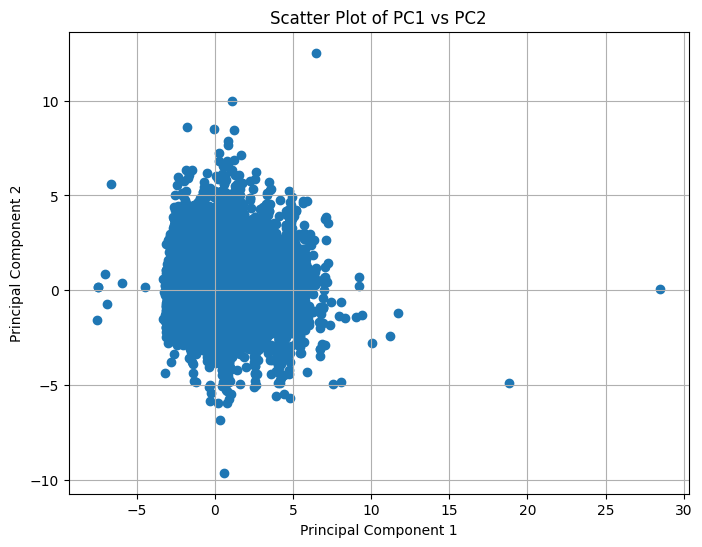

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_pca1['PC1'], df_pca1['PC2'])
plt.title('Scatter Plot of PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


We can clearly see the dimensions of the data has been changed from 6 to 2

## PERFORMING LINEAR REGRESSION ON THE TRANSFORMED DATA

In [29]:
x_pca.shape # the dimensions of the data now

(53940, 2)

In [30]:
y = numeric['price']
y  ## target variable

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split  # dividind the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression  #fitting the linear regression model here
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = regressor.predict(X_test)
y_pred

array([-1290.66642388,  2518.4580809 ,   790.40725323, ...,
        -357.9565673 ,  7335.45632935,  6570.99043147])

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3137088.182207058
R-squared: 0.8026594063583393


- The MSE value of 3137088.182207058 indicates the average squared difference between the actual and predicted values
- An R-squared value of 0.8026594063583393 means that approximately 80.27% of the variance in the target variable can be explained by the independent variables in the model.

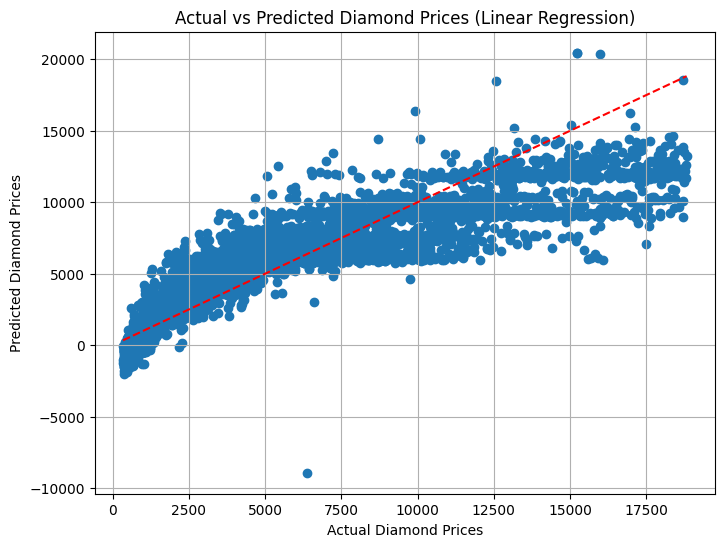

In [35]:
# plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Diamond Prices')
plt.ylabel('Predicted Diamond Prices')
plt.title('Actual vs Predicted Diamond Prices (Linear Regression)')
plt.grid(True)
plt.show()

## PERFORMING SVR[SUPPORT VECTOR REGRESSION] ON THE SAME DATA

In [36]:
#importing required libraries
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [37]:
# splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

In [38]:
# training the model here
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [39]:
# predicting the values here
y_pred = svr.predict(X_test)
print(y_pred)

[ 567.73206388 1794.58397892  957.70229779 ...  676.79041686 6367.46768176
 5562.11278278]


In [40]:
# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 2084390.381763534
R-squared: 0.8688800532764132


- The MSE value of 2084390.4210325675 indicates the average squared difference between the actual values and the predicted values by the model. 
- A lower MSE value suggests that the model's predictions are closer to the actual values, with this value representing the average squared error.[Lower than Linear regression]
- The R-squared value of 0.8688800508061687 indicates how well the independent variable(s) in a statistical model explain the variation in the dependent variable. [Little better than Linear Regression]

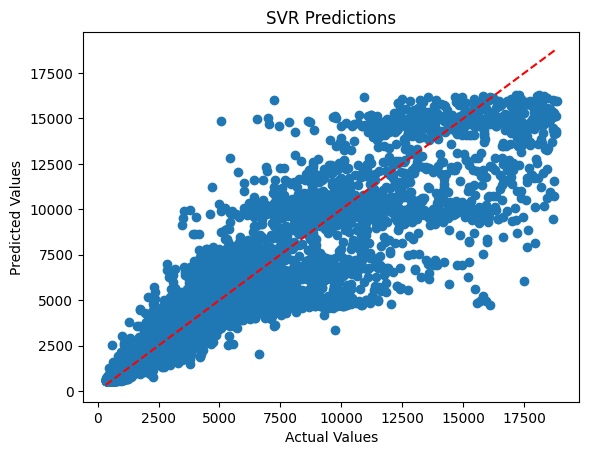

In [41]:
# Plotting the results
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Predictions')
plt.show()

- We created the price bins- 7 and divided the price in them.
- Then we are trying to classify that using Support Vector Machine.

# SVM - MODEL - 1

In [81]:
#importing required libraries
import pandas as pd
import numpy as np
#reading the file
df = pd.read_csv('D:/MACHINE LEARNING/CAC assignment/classSet1.csv')
#feature selection
features = ['carat', 'table', 'x', 'y', 'z']
X = df[features]
X = np.array(df[features])
a = np.array(df)
y = a[:,11]
print(y)
print(y.shape)
print(X)

[1 1 1 ... 3 3 3]
(53940,)
[[ 0.23 55.    3.95  3.98  2.43]
 [ 0.21 61.    3.89  3.84  2.31]
 [ 0.23 65.    4.05  4.07  2.31]
 ...
 [ 0.7  60.    5.66  5.68  3.56]
 [ 0.86 58.    6.15  6.12  3.74]
 [ 0.75 55.    5.83  5.87  3.64]]


In [82]:
# splitting the training and testing data set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=104,test_size=0.25,  shuffle=True)

In [83]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
# Converting y_train to integers if they are in float or some other
if y_train.dtype == 'float' or y_train.dtype == 'object':
    # If y_train contains float values, converting them to integers
    try:
        y_train = y_train.astype(int)
    except ValueError:
        # If y_train contains string labels, using LabelEncoder to convert it to numeric labels
        le = LabelEncoder()
        y_train = le.fit_transform(y_train)


print(f"Processed y_train type: {y_train.dtype}")
print(f"Unique values in processed y_train: {np.unique(y_train)}")

# Now fitting the SVM model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

Processed y_train type: int32
Unique values in processed y_train: [1 2 3 4 5 6 7]


SVC(kernel='linear')

In [4]:
# training accuracy
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_train)
acc = accuracy_score(y_train, predicted)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,clf.predict(X_train)))
c1_matrix = confusion_matrix(y_train,predicted)

print("The training accuracy is - ", acc)
print("The training confusion matrix is - ", "\n",  c1_matrix)

              precision    recall  f1-score   support

           1       0.86      0.95      0.90     10834
           2       0.76      0.68      0.72      7210
           3       0.65      0.69      0.67      4668
           4       0.62      0.57      0.59      6674
           5       0.62      0.68      0.65      7177
           6       0.52      0.36      0.42      2669
           7       0.59      0.48      0.53      1223

    accuracy                           0.71     40455
   macro avg       0.66      0.63      0.64     40455
weighted avg       0.70      0.71      0.70     40455

The training accuracy is -  0.7090100111234705
The training confusion matrix is -  
 [[10298   527     9     0     0     0     0]
 [ 1734  4925   516    35     0     0     0]
 [    7   940  3215   481    25     0     0]
 [    0    80  1222  3794  1578     0     0]
 [    2     1    20  1798  4909   411    36]
 [    1     0     0    49  1297   961   361]
 [    1     0     0     7   152   482   581]]


Here the training accuracy is - 70%

In [9]:
# Checking the type of y_test and its shape
print(f"y_test type: {type(y_test)}, shape: {y_test.shape}")

# Ensuring y_test is a numpy array
if not isinstance(y_test, np.ndarray):
    y_test = np.array(y_test)

# Ensuring y_test is one-dimensional
if y_test.ndim != 1:
    raise ValueError("y_test should be a one-dimensional array")


print(f"Unique values in y_test: {np.unique(y_test)}")
print(f"y_test data type: {y_test.dtype}")

# Converting y_test to integers if they are in float or other inappropriate format
if y_test.dtype == 'float' or y_test.dtype == 'object':
    # If y_test contains float values, convert to integers
    try:
        y_test = y_test.astype(int)
    except ValueError:
        # If y_test contains string labels, using LabelEncoder to convert to numeric labels
        le = LabelEncoder()
        y_test = le.fit_transform(y_test)

# Verifing the changes
print(f"Processed y_test type: {y_test.dtype}")
print(f"Unique values in processed y_test: {np.unique(y_test)}")

# Now predicting and calculating accuracy
predicted = clf.predict(X_test)
acc1 = accuracy_score(y_test, predicted)
print(f"Accuracy: {acc1}")

print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

y_test type: <class 'numpy.ndarray'>, shape: (13485,)
Unique values in y_test: [1 2 3 4 5 6 7]
y_test data type: object
Processed y_test type: int32
Unique values in processed y_test: [1 2 3 4 5 6 7]
Accuracy: 0.7096032628846867
              precision    recall  f1-score   support

           1       0.85      0.95      0.90      3665
           2       0.78      0.67      0.72      2494
           3       0.62      0.70      0.66      1463
           4       0.63      0.57      0.60      2205
           5       0.62      0.70      0.65      2327
           6       0.51      0.35      0.42       898
           7       0.60      0.48      0.53       433

    accuracy                           0.71     13485
   macro avg       0.66      0.63      0.64     13485
weighted avg       0.70      0.71      0.70     13485

[[3474  187    4    0    0    0    0]
 [ 620 1671  188   15    0    0    0]
 [   1  275 1031  142   14    0    0]
 [   0   20  431 1249  501    3    1]
 [   0    0    7  560 

Here the Testing accuracy is - 71%

# SVM - MODEL - 2

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
#reading the file
df = pd.read_csv('D:/MACHINE LEARNING/CAC assignment/classSet2.csv')
#feature selection
features = ['carat', 'table', 'x', 'y', 'z']
X = df[features]
X = np.array(df[features])
a = np.array(df)
y = a[:,12]
print(y)
print(y.shape)
print(X)

['A' 'A' 'A' ... 'A' 'A' 'A']
(53940,)
[[ 0.23 55.    3.95  3.98  2.43]
 [ 0.21 61.    3.89  3.84  2.31]
 [ 0.23 65.    4.05  4.07  2.31]
 ...
 [ 0.7  60.    5.66  5.68  3.56]
 [ 0.86 58.    6.15  6.12  3.74]
 [ 0.75 55.    5.83  5.87  3.64]]


In [2]:
# splitting the training and testing data set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=104,test_size=0.25,  shuffle=True)

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
# Converting y_train to integers if they are in float or some other
if y_train.dtype == 'float' or y_train.dtype == 'object':
    # If y_train contains float values, converting them to integers
    try:
        y_train = y_train.astype(int)
    except ValueError:
        # If y_train contains string labels, using LabelEncoder to convert them to numeric labels
        le = LabelEncoder()
        y_train = le.fit_transform(y_train)


print(f"Processed y_train type: {y_train.dtype}")
print(f"Unique values in processed y_train: {np.unique(y_train)}")

# Now fitting the SVM model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

Processed y_train type: int32
Unique values in processed y_train: [0 1 2 3]


SVC(kernel='linear')

In [4]:
# training accuracy
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_train)
acc = accuracy_score(y_train, predicted)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,clf.predict(X_train)))
c1_matrix = confusion_matrix(y_train,predicted)

print("The training accuracy is - ", acc)
print("The training confusion matrix is - ", "\n",  c1_matrix)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     29221
           1       0.61      0.65      0.63      7024
           2       0.54      0.34      0.42      2681
           3       0.62      0.67      0.64      1529

    accuracy                           0.85     40455
   macro avg       0.68      0.65      0.66     40455
weighted avg       0.84      0.85      0.84     40455

The training accuracy is -  0.8453837597330367
The training confusion matrix is -  
 [[27675  1541     5     0]
 [ 1878  4585   483    78]
 [   80  1144   919   538]
 [    9   193   306  1021]]


Here the training accuracy is - 84%

In [5]:
# Checking the type of y_test and its shape
print(f"y_test type: {type(y_test)}, shape: {y_test.shape}")

# Ensuring y_test is a numpy array
if not isinstance(y_test, np.ndarray):
    y_test = np.array(y_test)

# Ensuring y_test is one-dimensional
if y_test.ndim != 1:
    raise ValueError("y_test should be a one-dimensional array")


# Checking the unique values and their data types
print(f"Unique values in y_test: {np.unique(y_test)}")
print(f"y_test data type: {y_test.dtype}")

# Converting y_test to integers if they are in float or other inappropriate format
if y_test.dtype == 'float' or y_test.dtype == 'object':
    # If y_test contains float values, converting it to integers
    try:
        y_test = y_test.astype(int)
    except ValueError:
        # If y_test contains string labels, using LabelEncoder to convert them to numeric labels
        le = LabelEncoder()
        y_test = le.fit_transform(y_test)


print(f"Processed y_test type: {y_test.dtype}")
print(f"Unique values in processed y_test: {np.unique(y_test)}")

# Now predicting and calculating accuracy
predicted = clf.predict(X_test)
acc1 = accuracy_score(y_test, predicted)
print(f"Accuracy: {acc1}")

# Print classification report and confusion matrix
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

y_test type: <class 'numpy.ndarray'>, shape: (13485,)
Unique values in y_test: ['A' 'B' 'C' 'D']
y_test data type: object
Processed y_test type: int32
Unique values in processed y_test: [0 1 2 3]
Accuracy: 0.8468668891360771
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      9784
           1       0.61      0.66      0.64      2266
           2       0.49      0.31      0.38       896
           3       0.62      0.65      0.64       539

    accuracy                           0.85     13485
   macro avg       0.66      0.64      0.65     13485
weighted avg       0.84      0.85      0.84     13485

[[9290  491    3    0]
 [ 583 1501  161   21]
 [  23  399  276  198]
 [   5   58  123  353]]


Here the Testing accuracy is - 85%

-----------------------------------------------------------------------

### Support Vector Machine (SVM) with Different Binning Strategies:

#### Model 1 (7 bins):
- Training Accuracy: 70%
- Testing Accuracy: 71%
#### Model 2 (4 bins):
- Training Accuracy: 84%
- Testing Accuracy: 85%

### Conclusion:

The model with fewer bins (4 bins) achieved significantly higher training and testing accuracy compared to the model with more bins (7 bins). This suggests that the target variable, when divided into 4 bins, resulted in a classification problem that was easier for the SVM to learn and generalize from. The higher accuracy in Model 2 indicates that the binning strategy plays a crucial role in the performance of classification models, potentially due to better-defined class boundaries and reduced complexity.

### Principal Component Analysis (PCA) Followed by Regression Models:

#### Linear Regression:
- Mean Squared Error (MSE): 3,137,088.18
- R-squared: 0.8027
#### Support Vector Regression (SVR):
- Mean Squared Error (MSE): 2,084,390.38
- R-squared: 0.8689

### Conclusion:
Both regression models performed well after applying PCA, with SVR outperforming Linear Regression in terms of both MSE and R-squared. The lower MSE and higher R-squared for SVR indicate that it provided a better fit to the data compared to Linear Regression. This suggests that SVR is more effective in capturing the underlying patterns in the reduced-dimensional space provided by PCA, likely due to its flexibility in modeling non-linear relationships.

### Overall Observation:

SVM Classification Performance: The choice of binning strategy for the target variable significantly affects the performance of SVM models. Fewer bins (4 bins) led to better performance, indicating that simpler class structures were easier for the model to learn.
Regression Performance with PCA: SVR outperformed Linear Regression in the reduced-dimensional space created by PCA. The higher R-squared and lower MSE for SVR suggest it is better suited for capturing complex relationships in the data.